In [1]:
import matplotlib.pyplot as plt
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

# 데이터셋 출처 : https://millercenter.org/the-presidency/presidential-speeches
base_dir = ".\\Speechs"
file_list = os.listdir(".\\Speechs\\")
# print(file_list)
file_list = sorted(file_list, key= lambda x: int(x.split("_")[0]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rappi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rappi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# 파일 제목으로 각 대수, 이름, 시기, 주제, 내용으로 파싱.
ORDERS = []
NAMES = []
DATES = []
SUBJECTS = []
CONTENTS = []

# 문장 길이
sent_length = []

# 총 단어
total_words_thorough_All_address = []
words = []

total_sent_thorough_All_address = 0
total_unique_word = 0

In [4]:
# 모든 문서를 기준으로 돕니다.
for file in file_list:
    # 파일 제목을 기반으로 대, 이름, 날짜, 제목을 파싱하여 시기별로 저장
    parsing = file.split(".")[0].split("_")
    order = parsing[0]
    ORDERS.append(order)
    name = parsing[1][1:-1]
    NAMES.append(name)
    date = parsing[2].split(",")[1]
    DATES.append(date)
    subject = parsing[3]
    SUBJECTS.append(subject)

    # 연설문 파일을 읽어 내용을 ct 변수에 저장한다.
    speech = open(os.path.join(base_dir, file))
    content = speech.read()

    # 시기별 연설문 내용을 저장
    CONTENTS.append(content)

    # 문장 개수 계산
    sentences = sent_tokenize(content)
    total_sent_thorough_All_address += len(sentences)

    # 문장 길이를 단어의 개수로 계산
    sent_len = 0
    word = []
    for sent in sentences:
        # 모든 단어를 소문자로 바꾼다.
        sent = sent.lower()

        # 각 문장에 단어의 개수를 계산
        word_in_each_sentence = word_tokenize(sent)
        sent_len += len(word_in_each_sentence)

        # 시기를 나누지 않은 전체 단어들의 모음
        total_words_thorough_All_address += word_in_each_sentence

        # 시기를 나누어 단어들을 나눔
        word += word_in_each_sentence

    words.append(word)
    # 한 문장당 몇 개의 단어가 있는지를 누적합하였으므로 최종적으로 몇 개의 문장이 있는지 계산하여 나누어주면 각 시기별 문장의 평균 단어 수를 기준으로 문장의 길이를 계산.
    sent_len /= len(sent_tokenize(content))
    sent_length.append(sent_len)

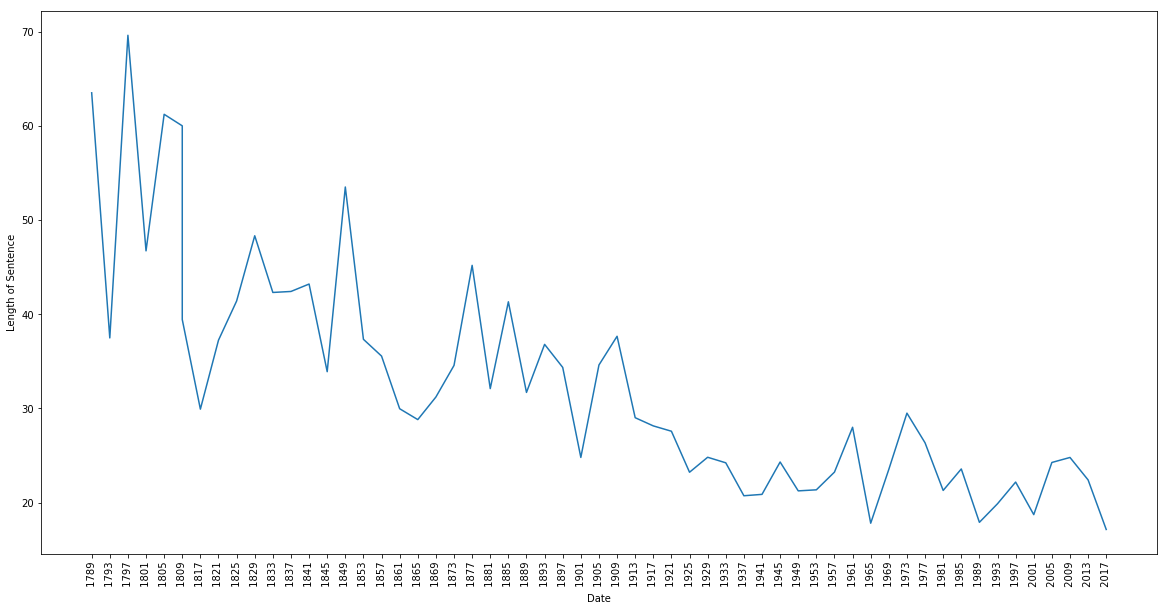

In [5]:
# 아래 그래프는 각 시기별 문장의 평균 길이는 어떻게 변화하는지 보여줍니다.
plt.figure(figsize=(20, 10))
plt.plot(DATES, sent_length)
plt.xlabel("Date")
plt.ylabel("Length of Sentence")
plt.xticks(rotation=90)
plt.show()

In [6]:
# 각 시기별로 중복 단어들을 제거 후 카운팅
unique_word = 0
unique_words = []
for w in words:
    unique_word += len(list(set(w)))
    unique_words.append(list(set(w)))

In [7]:
# 시기를 나누지 않은 전체 중에서 중복 단어들을 제거 후 카운팅
# 근데 사실 시기를 나누지 않은 단어들은 의미가 없음.
# total_unique_word = len(list(set(total_words_thorough_All_address)))

# 전체 데이터 양
print("Total {1} sentences and {2} words in {0} the inaugural address.".format(len(file_list), total_sent_thorough_All_address, len(total_words_thorough_All_address)))
# 단어 중복을 제거합니다.
print("After elimination duplicated words there are {0} words left..".format(unique_word))

Total 5028 sentences and 148515 words in 58 the inaugural address.
After elimination duplicated words there are 46398 words left..


In [8]:
# 불용어 단어 제거
result_filter = []
stop_words = set(stopwords.words('english'))
for uw in unique_words:
    temp = []
    for w in uw:
        if w not in stop_words:
            temp.append(w)
    result_filter.append(temp)

In [9]:
# 무의미한 단어 제거
result_final = []
custom_stop_words = ['-', '(', ')', '.)', '[', ']', '?', '.', ',', ':', '“', ';', '.”', "'", "’", '"', '."', '...', \
                     '--', '41,000,000', '100,000,000', '200,000,000','!', '$', '0', '6th', 'february,1899','13th', '14th', '15th', '18th', '19th', '20th', '50th', '21st', '0', '1', '2', \
                     '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '25', '29', '30', '31', '42', \
                     '50', '56', '60', '200', '225', '400', 'ii', '1800', '1816', '1898', '1954', '1776', '1789', '1980', \
                     '1917', '1899', '000', 'c', 'mr', 'said', 'g', '2017', '?-', 'one', 'two', 'ones', 'three', 'four', \
                     'five', 'six', 'sixty', 'seven', 'seventy', 'fifty', 'eight', 'eighty', 'ten', 'twenty', 'thirty', \
                     'fifty', 'could', 'must', 'should', 'might', 'would', 'can', '000', '000peopl', '100', '120', '125', \
                     '16', '1774', '1778', '1780', '1787', '1790', '1801', '1812', '1815', '1817', '1818', '1826', '1850', \
                     '1861', '1868', '1873', '1880', '1886', '1890', '1893', '1896', '1897', '1899', '1907', '1933', \
                     '1939', '1940', '1941', '1945', '1950', '1955', '1956', '1958', '1959', '1972', '1984', '20', '200', \
                     '200th', '24', '26', '28', '30th', '3d', '40', '41', '48', '4th', '67', '6th', '_in', '5,000,000peopl',\
                     '4,000,000','20,000', '67,000,000', '120,000,000', 'fellow', 'citizen', 'may', 'shall']

In [10]:
for uw in result_filter:
    temp = []
    for w in uw:
        if w not in custom_stop_words:
            temp.append(w)
    result_final.append(temp)

print(len(result_filter[0]))


517


In [11]:
filtered_words = 0
for w in result_final:
    # print(w)
    # print(len(w))
    filtered_words += len(w)

print("불용어와 무의미한 단어들을 제거하고 난 뒤의 단어의 개수는 총 {0} 개이다.".format(filtered_words))

불용어와 무의미한 단어들을 제거하고 난 뒤의 단어의 개수는 총 40450 개이다.


In [12]:
# 어간 추출
s = SnowballStemmer('english')
stem_list = []
for ws in result_final:
    temp = []
    for w in ws:
        temp.append(s.stem(w))
    stem_list.append(temp)

stem_list2 = []
for ws in stem_list:
    temp = []
    for w in ws:
        temp.append(s.stem(w))
    stem_list2.append(temp)

before_filtered_stem = 0
for stems in stem_list:
    before_filtered_stem += len(stems)

In [13]:
# 다시 한번 중복 제거
final_filtered_stm_count = 0
final_filtered_stm = []
for uw in stem_list2:
    temp = []
    for w in uw:
        if w not in custom_stop_words:
            temp.append(w)
    final_filtered_stm_count += len(temp)
    final_filtered_stm.append(temp)

print("어간의 개수", final_filtered_stm_count)

filtered_stem_sum = 0
for stems in stem_list:
    filtered_stem_sum += len(stems)

어간의 개수 40399


In [14]:
# TF-IDF를 구하기 위하여 단어들을 합친다.
for_tfidf = []
for stems in final_filtered_stm:
    for_tfidf.append(' '.join(stems))

vectorize = TfidfVectorizer(
    tokenizer=None,
    min_df=0.01,
    sublinear_tf=True,
    max_features=125
)
X = vectorize.fit_transform(for_tfidf)
features = vectorize.get_feature_names()

dictionary = vectorize.vocabulary_

mean_tf_idf = np.mean(X.toarray(), axis=0)
print(mean_tf_idf)

[0.06902122 0.06593504 0.07880786 0.06556163 0.06777054 0.06818641
 0.08072726 0.06476714 0.07536087 0.07039907 0.07255234 0.07218268
 0.08900586 0.07841286 0.0723983  0.06296762 0.07413903 0.06481745
 0.06233381 0.06742555 0.0749849  0.0663608  0.07848926 0.06355893
 0.06810794 0.06383204 0.06743525 0.07633518 0.06581211 0.05974204
 0.07933266 0.06886048 0.06670545 0.07658164 0.06172892 0.06837082
 0.06982117 0.06516827 0.05944549 0.06656403 0.05869029 0.0673314
 0.06728214 0.10003665 0.07475088 0.06755177 0.06604302 0.07621749
 0.08337297 0.07179699 0.07062914 0.06019444 0.06257938 0.06748975
 0.07891694 0.05831605 0.0705542  0.06707926 0.08076683 0.06235144
 0.06074811 0.07085651 0.08480581 0.06286975 0.06816746 0.08023983
 0.05868567 0.06654785 0.06056291 0.06470218 0.11861498 0.07749723
 0.06241367 0.06165072 0.06124629 0.07351711 0.06703429 0.06313427
 0.06592124 0.07398421 0.07350862 0.06284786 0.08011424 0.06327268
 0.09373128 0.06305535 0.06666152 0.07766019 0.06888539 0.07337

In [15]:
# k means
model = KMeans(n_clusters=4, init="random", n_init=20, max_iter=1000, random_state=5).fit(X.toarray())

model2 = KMeans(n_clusters=3, init="random", n_init=10, max_iter=100, random_state=8).fit(X.toarray().transpose())

print("Labels2")
print(model2.labels_)
print(len(model2.labels_))

Labels2
[0 1 2 1 2 2 0 2 1 2 0 1 0 1 0 1 2 1 1 2 2 1 1 1 2 1 2 1 1 2 0 1 0 2 1 2 1
 0 2 2 2 2 2 0 2 2 2 0 2 2 1 1 1 2 1 2 2 2 1 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2
 1 0 2 1 1 2 2 1 2 2 1 1 1 1 0 1 2 1 1 1 1 2 1 1 1 0 1 2 2 1 2 2 2 2 1 1 1
 0 2 1 0 2 2 2 2 2 2 1 2 2 2]
125


In [16]:
cluster0 = []
cluster1 = []
cluster2 = []

for cluster_index in range(len(model2.labels_)):
    if model2.labels_[cluster_index] == 0:
        cluster0.append(features[cluster_index])
    elif model2.labels_[cluster_index] == 1:
        cluster1.append(features[cluster_index])
    else:
        cluster2.append(features[cluster_index])

print(cluster0)
print(cluster1)
print(cluster2)

['act', 'call', 'confid', 'constitut', 'countri', 'execut', 'express', 'found', 'govern', 'honor', 'offic', 'presid', 'requir', 'take', 'unit']
['advanc', 'author', 'civil', 'consid', 'continu', 'danger', 'declar', 'depend', 'direct', 'duti', 'effect', 'encourag', 'equal', 'establish', 'exist', 'favor', 'form', 'import', 'independ', 'individu', 'interest', 'law', 'limit', 'maintain', 'mind', 'object', 'parti', 'patriot', 'person', 'power', 'practic', 'present', 'preserv', 'principl', 'promot', 'prosper', 'protect', 'provid', 'question', 'reason', 'relat', 'respect', 'secur', 'state', 'success', 'support', 'trust', 'without']
['american', 'believ', 'bless', 'chang', 'come', 'day', 'determin', 'differ', 'effort', 'end', 'everi', 'faith', 'forc', 'free', 'friend', 'futur', 'give', 'good', 'great', 'hand', 'heart', 'hope', 'human', 'industri', 'justic', 'know', 'land', 'liberti', 'life', 'live', 'long', 'make', 'mani', 'mean', 'men', 'nation', 'need', 'never', 'new', 'part', 'peac', 'peopl

In [17]:
# stem_list2 에서 카운팅 하면 됨.
year_count0 = []
year_count1 = []
year_count2 = []
for y in stem_list2:
    count_cluster0 = 0
    count_cluster1 = 0
    count_cluster2 = 0
    for w in y:
        if w in cluster0:
            count_cluster0 += 1
        if w in cluster1:
            count_cluster1 += 1
        if w in cluster2:
            count_cluster2 += 1
    total = count_cluster0 + count_cluster1 + count_cluster2
    count_cluster0 = count_cluster0 / total
    count_cluster1 = count_cluster1 / total
    count_cluster2 = count_cluster2 / total

    year_count0.append(count_cluster0)
    year_count1.append(count_cluster1)
    year_count2.append(count_cluster2)

print(year_count0)
print(year_count1)
print(year_count2)

[0.19801980198019803, 0.8095238095238095, 0.10948905109489052, 0.1504424778761062, 0.1366906474820144, 0.09090909090909091, 0.14772727272727273, 0.12790697674418605, 0.12631578947368421, 0.1, 0.19090909090909092, 0.18888888888888888, 0.1326530612244898, 0.18548387096774194, 0.15151515151515152, 0.2358490566037736, 0.15950920245398773, 0.125, 0.14857142857142858, 0.09615384615384616, 0.17073170731707318, 0.09900990099009901, 0.15037593984962405, 0.12727272727272726, 0.14018691588785046, 0.14285714285714285, 0.13513513513513514, 0.09467455621301775, 0.14184397163120568, 0.13846153846153847, 0.14444444444444443, 0.06741573033707865, 0.03529411764705882, 0.14556962025316456, 0.10989010989010989, 0.10497237569060773, 0.14285714285714285, 0.12, 0.1111111111111111, 0.14814814814814814, 0.0896551724137931, 0.15503875968992248, 0.10857142857142857, 0.10465116279069768, 0.05, 0.12371134020618557, 0.10576923076923077, 0.12222222222222222, 0.125, 0.12030075187969924, 0.13043478260869565, 0.1348314

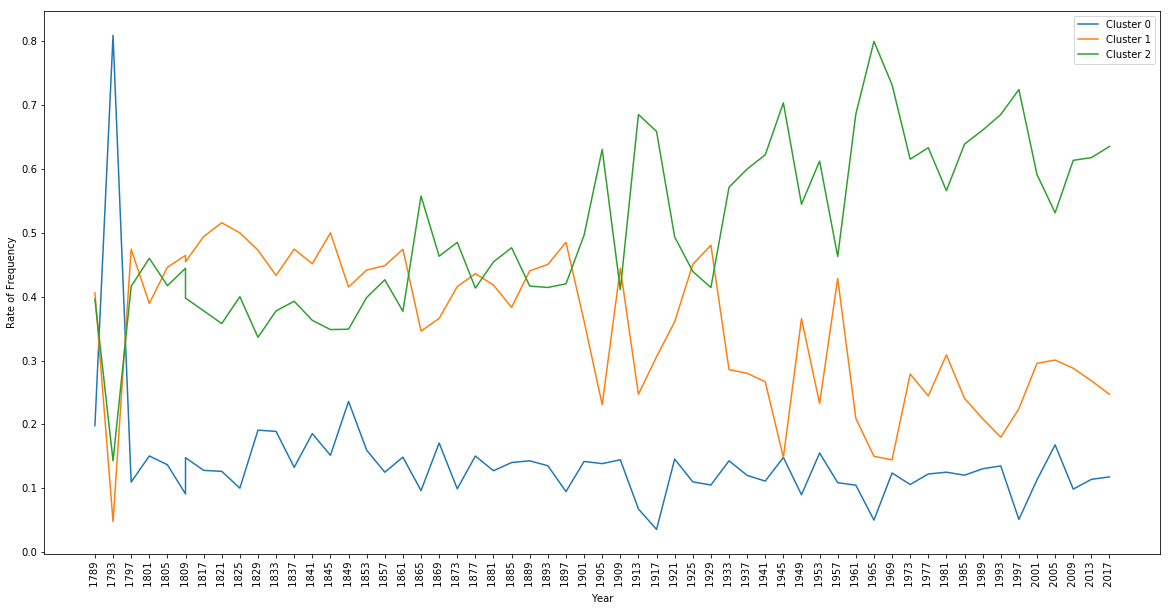

In [18]:
# 아래 그래프는 연도별 군집 비율을 그래프로 그려줍니다.
plt.figure(figsize=(20, 10))
plt.plot(DATES, year_count0, label='Cluster 0')
plt.plot(DATES, year_count1, label='Cluster 1')
plt.plot(DATES, year_count2, label='Cluster 2')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Rate of Frequency")
plt.xticks(rotation=90)
plt.show()